In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,6)

In [2]:
%matplotlib inline

In [3]:
def hf_function_bench1(x):
    y_hf1 = ((6*x - 2)**2)*np.sin(12*x-4)
    return y_hf1

def lf_function_bench1(x):
    y_lf1 = .5*hf_function_bench1(x) + 10*(x-0.5) + 5
    return y_lf1

Text(0.5, 1.0, 'Standard Scaler Visualization')

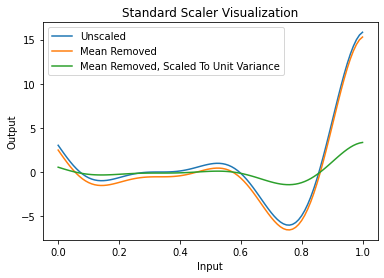

In [17]:
x = np.linspace(0, 1, num=101, endpoint=True).reshape(-1,1)
y = hf_function_bench1(x)

function1Mean = np.mean(hf_function_bench1(x))
stdDev = np.std(y)
plt.plot(x, y, label='Unscaled')
plt.plot(x, y-function1Mean, label = 'Mean Removed')
plt.plot(x, (y-function1Mean)/stdDev, label = 'Mean Removed, Scaled To Unit Variance')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Standard Scaler Visualization')

Text(0.5, 1.0, 'Mean Subtracted')

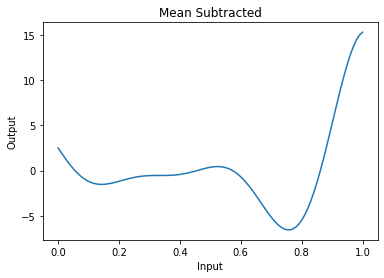

In [12]:
plt.plot(x, hf_function_bench1(x)-function1Mean)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Mean Subtracted')

In [18]:
pip install numba

     ---------------------------------------- 2.4/2.4 MB 9.4 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 14.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
from numba import jit, cuda
import numpy as np
# to measure exec time
from timeit import default_timer as timer

# normal function to run on cpu
def func(a):								
	for i in range(10000000):
		a[i]+= 1	

# function optimized to run on gpu
@jit(target ="cuda")						
def func2(a):
	for i in range(10000000):
		a[i]+= 1
if __name__=="__main__":
	n = 10000000							
	a = np.ones(n, dtype = np.float64)
	b = np.ones(n, dtype = np.float32)
	
	start = timer()
	func(a)
	print("without GPU:", timer()-start)	
	
	start = timer()
	func2(a)
	print("with GPU:", timer()-start)


without GPU: 4.206433200000902


KeyError: "Unrecognized options: {'target'}. Known options are dict_keys(['_nrt', 'boundscheck', 'debug', 'error_model', 'fastmath', 'forceinline', 'forceobj', 'inline', 'looplift', 'no_cfunc_wrapper', 'no_cpython_wrapper', 'no_rewrites', 'nogil', 'nopython', 'parallel', 'target_backend'])"